In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
#aggregating
customer_transactions = transactions.groupby("CustomerID").agg(
    TotalSpent=("TotalValue", "sum"),        
    AvgSpent=("TotalValue", "mean"),        
    TotalTransactions=("TransactionID", "count"),  
    UniqueProducts=("ProductID", "nunique") 
).reset_index()

In [4]:
customer_data = customers.merge(customer_transactions, on="CustomerID", how="inner")

In [5]:
print(customer_data.head())

  CustomerID        CustomerName         Region  SignupDate  TotalSpent  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   AvgSpent  TotalTransactions  UniqueProducts  
0   670.904                  5               5  
1   465.685                  4               4  
2   681.345                  4               4  
3   669.360                  8               8  
4   678.080                  3               3  


In [6]:
#preprocessing
features = customer_data[["TotalSpent", "AvgSpent", "TotalTransactions", "UniqueProducts"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
#applying K-Means Clustering Algorithm
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\97150\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97150\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97150\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97150\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

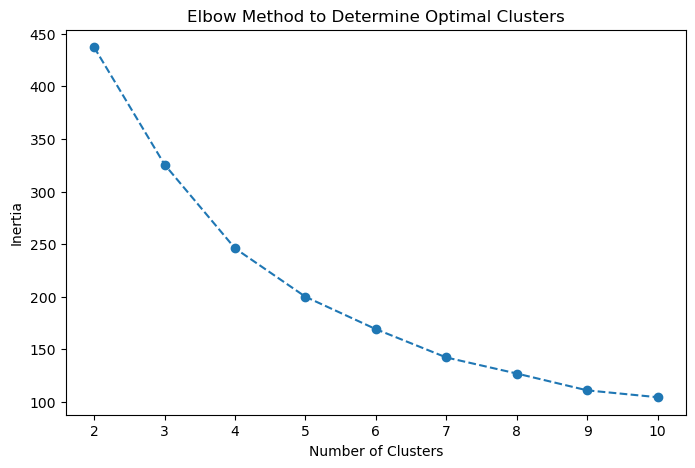

In [8]:
# Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.show()

In [9]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(features_scaled)

C:\Users\97150\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
#evaluating clustering performance
db_index = davies_bouldin_score(features_scaled, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8741471963308304


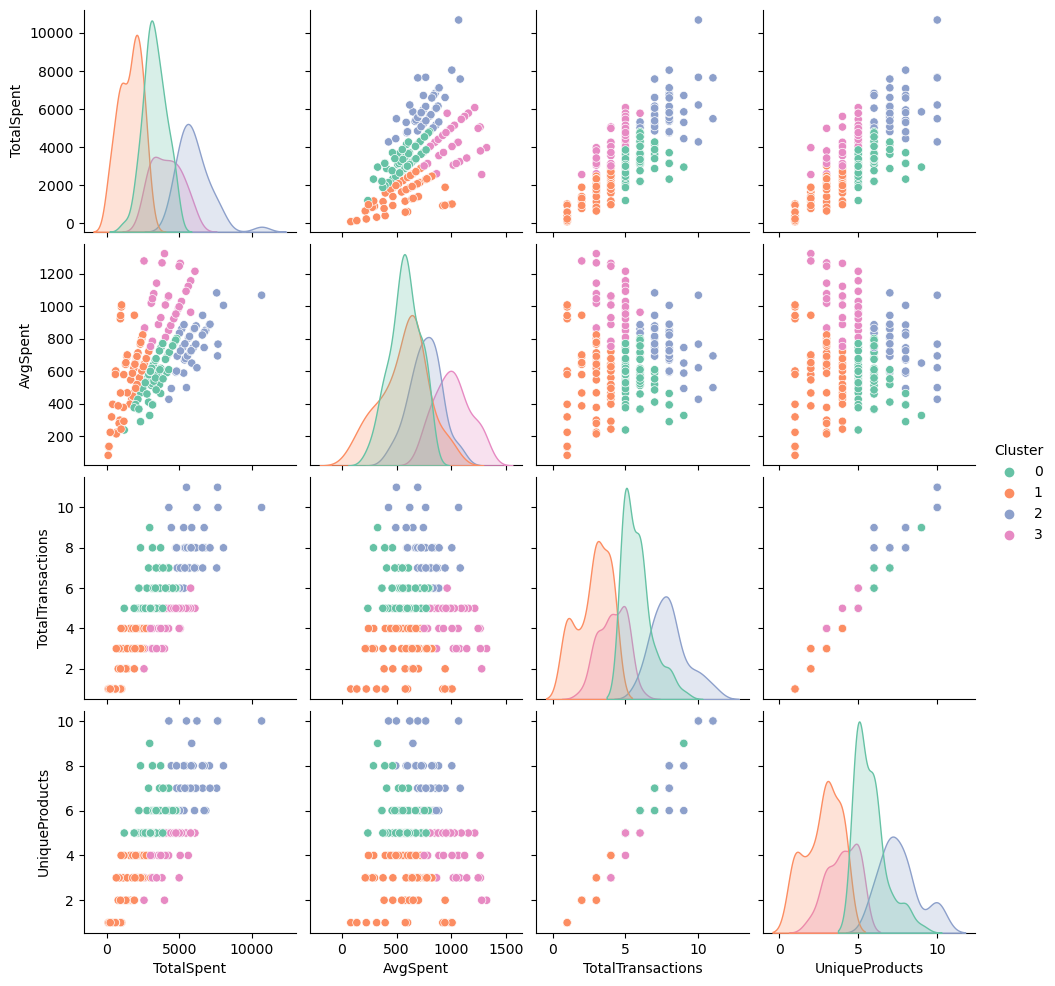

Cluster Centroids:
    TotalSpent     AvgSpent  TotalTransactions  UniqueProducts
0  3282.835246   573.314369           5.803279        5.770492
1  1596.856774   568.724449           2.806452        2.741935
2  6016.098537   762.304518           8.000000        7.609756
3  4116.498571  1009.739390           4.114286        4.000000


In [11]:
#cluster visualization
sns.pairplot(customer_data, hue="Cluster", diag_kind="kde", palette="Set2")
plt.show()
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features.columns)
print("Cluster Centroids:")
print(centroid_df)